CODE BARU LAGI UHUYY

In [9]:
!pip install datasets scikit-learn matplotlib seaborn nltk

import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


PROCESSING

In [10]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

PETA EMOSI

In [11]:
label_map = {
    'sadness': ('Kesedihan', '😢'),
    'joy': ('Kebahagiaan', '😊'),
    'love': ('Cinta', '❤️'),
    'anger': ('Marah', '😠'),
    'fear': ('Takut', '😨'),
    'surprise': ('Terkejut', '😮')
}

DATASET & VISUALISASI

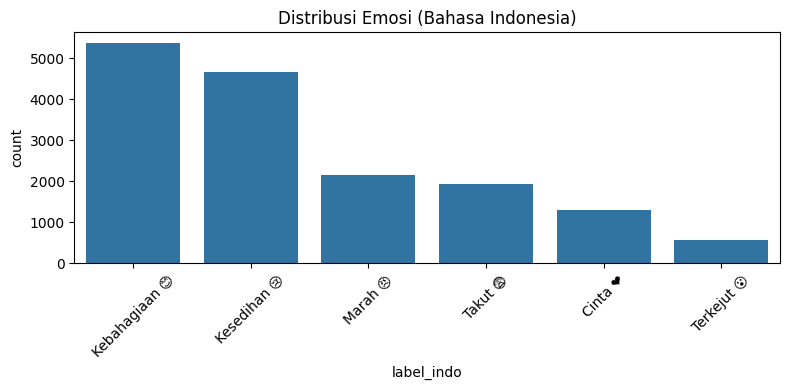

In [12]:
dataset = load_dataset("dair-ai/emotion")
label_names = dataset['train'].features['label'].names

X = [preprocess(t) for t in dataset['train']['text']]
y = dataset['train']['label']

df = pd.DataFrame({'text': X, 'label': [label_names[i] for i in y]})
df['label_indo'] = df['label'].map(lambda l: f"{label_map[l][0]} {label_map[l][1]}")

# Visualisasi distribusi
plt.figure(figsize=(8, 4))
sns.countplot(x='label_indo', data=df, order=df['label_indo'].value_counts().index)
plt.title("Distribusi Emosi (Bahasa Indonesia)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NAIVE BAYES TRAINING

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

EVALUASI MODEL

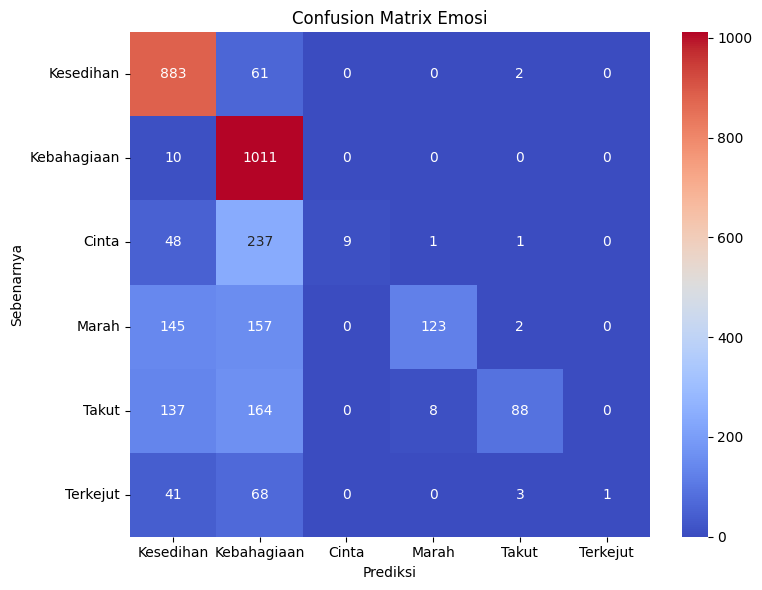

🎯 Akurasi Model: 66.09 %

📋 Laporan Klasifikasi:

              precision    recall  f1-score   support

   Kesedihan       0.70      0.93      0.80       946
 Kebahagiaan       0.60      0.99      0.74      1021
       Cinta       1.00      0.03      0.06       296
       Marah       0.93      0.29      0.44       427
       Takut       0.92      0.22      0.36       397
    Terkejut       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.86      0.41      0.40      3200
weighted avg       0.76      0.66      0.58      3200



In [14]:
y_pred = model.predict(X_test_vec)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=[label_map[l][0] for l in label_names],
            yticklabels=[label_map[l][0] for l in label_names],
            cmap="coolwarm")
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.title("Confusion Matrix Emosi")
plt.tight_layout()
plt.show()

# Akurasi dan laporan
print("🎯 Akurasi Model:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n📋 Laporan Klasifikasi:\n")
print(classification_report(y_test, y_pred, target_names=[label_map[l][0] for l in label_names]))

PREDIKSI INTERAKTIF

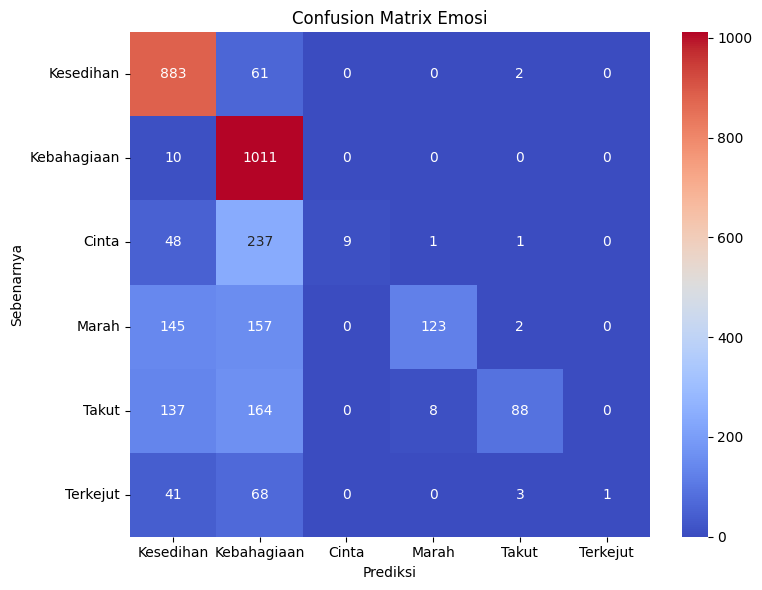

🎯 Akurasi Model: 66.09 %

📋 Laporan Klasifikasi:

              precision    recall  f1-score   support

   Kesedihan       0.70      0.93      0.80       946
 Kebahagiaan       0.60      0.99      0.74      1021
       Cinta       1.00      0.03      0.06       296
       Marah       0.93      0.29      0.44       427
       Takut       0.92      0.22      0.36       397
    Terkejut       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.86      0.41      0.40      3200
weighted avg       0.76      0.66      0.58      3200



In [15]:
y_pred = model.predict(X_test_vec)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=[label_map[l][0] for l in label_names],
            yticklabels=[label_map[l][0] for l in label_names],
            cmap="coolwarm")
plt.xlabel("Prediksi")
plt.ylabel("Sebenarnya")
plt.title("Confusion Matrix Emosi")
plt.tight_layout()
plt.show()

# Akurasi dan laporan
print("🎯 Akurasi Model:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n📋 Laporan Klasifikasi:\n")
print(classification_report(y_test, y_pred, target_names=[label_map[l][0] for l in label_names]))